In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
cap = cv2.imread("Ferramentas-de-pedreiro-capa.jpg", cv2.COLOR_BGR2RGB)
cap_rgb = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB)

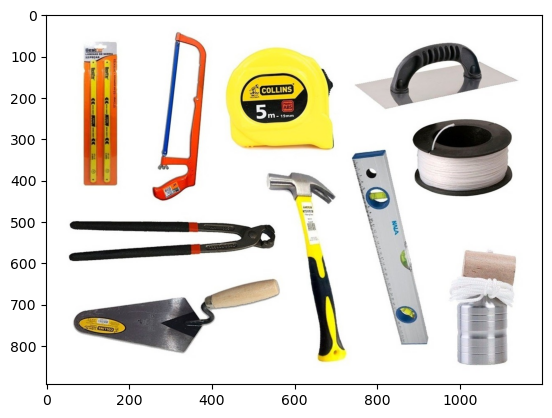

In [4]:
plt.imshow(cap_rgb)
plt.show()

In [19]:
blurred = cv2.GaussianBlur(cap_rgb, (5, 5), 0)

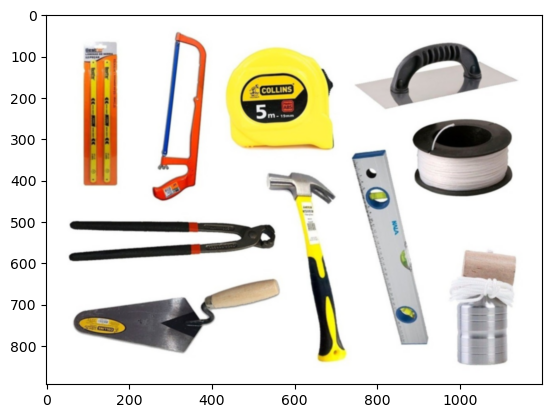

In [20]:
plt.imshow(blurred)
plt.show()

In [22]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

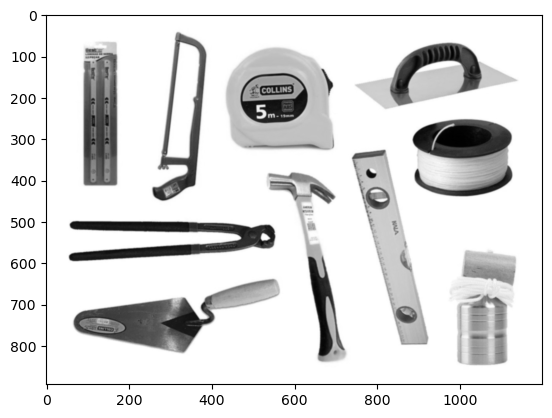

In [23]:
plt.imshow(gray, cmap=plt.cm.gray)
plt.show()

In [24]:
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

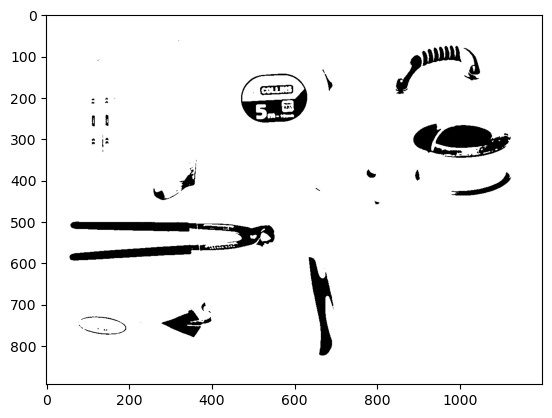

In [25]:
plt.imshow(thresh, cmap=plt.cm.gray)
plt.show()

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

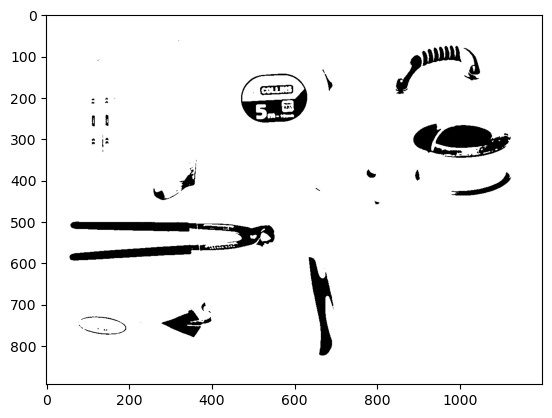

In [27]:
plt.imshow(thresh, cmap=plt.cm.gray)
plt.show()

In [40]:
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_contours = cv2.drawContours(cap.copy(), contours, 0, (0,255,0), 2)

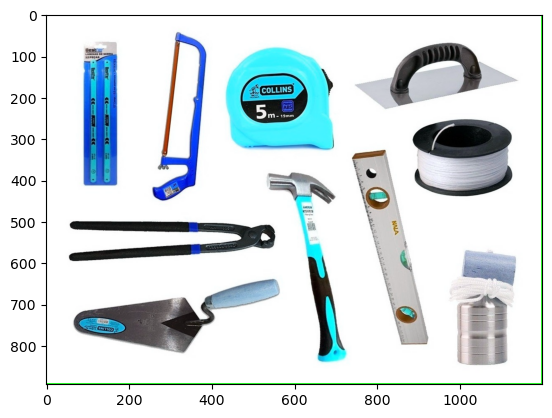

In [42]:
plt.imshow(image_contours, cmap=plt.cm.gray)
plt.show()

In [43]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000 and area < 5000:
        # Peça presente na linha de produção
        cv2.drawContours(cap, [contour], 0, (0, 255, 0), 2)
    else:
        # Peça ausente na linha de produção
        cv2.drawContours(cap, [contour], 0, (0, 0, 255), 2)

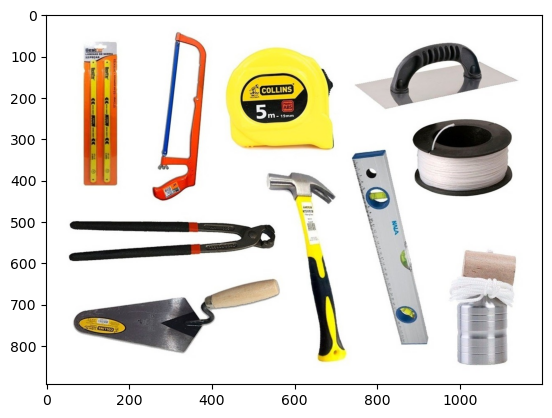

In [44]:
plt.imshow(cap_rgb)

plt.show()

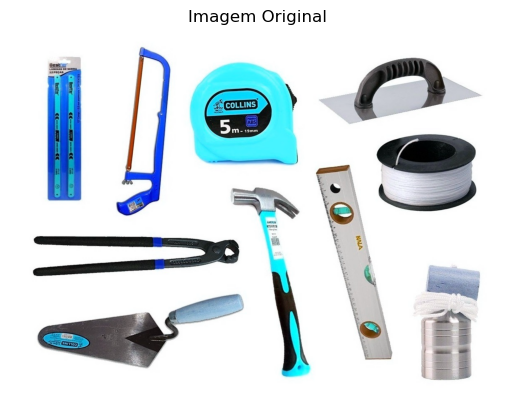

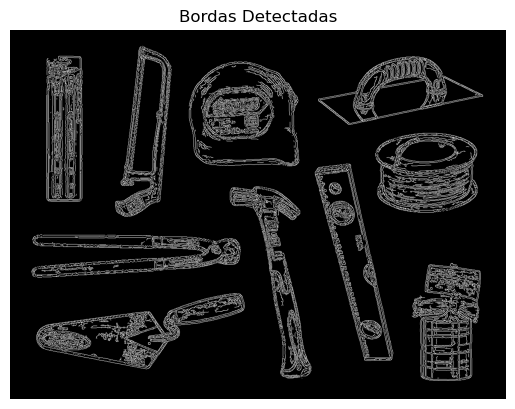

In [7]:
# Aplica filtro Gaussiano para suavizar a imagem
img_blur = cv2.GaussianBlur(cap_rgb, (5, 5), 0)

# Calcula a magnitude do gradiente da imagem utilizando os operadores de Sobel
sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(sobelx ** 2 + sobely ** 2)

# Aplica o algoritmo Canny para detectar as bordas na imagem
edges = cv2.Canny(grad_mag.astype(np.uint8), 50, 150)

# Exibe a imagem de entrada e a imagem resultante com as bordas detectadas
plt.imshow(cv2.cvtColor(cap_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')
plt.show()

plt.imshow(edges, cmap='gray')
plt.title('Bordas Detectadas')
plt.axis('off')
plt.show()